## Main goals for analysis:
* Scan duration (each separate scan)
* Number of packets sent/received/overall
* Packets pr. second
* Order of ports scanned
* Payloads

* IP-ID
* Packet size
* TCP Window size
* Sequence number

###### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import numpy as np

scanner_ip = "192.168.2.230"
scan_title = 'nmap FIN scan (polite)'
plt.rcParams["figure.figsize"] = (15,10)

###### Read data - output from 'process_pcap_with_payload.py'

In [2]:
directory = '/home/USER/notebooks/pcaps/nmap_fin_scan_polite'
scan_list = []

for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        filename, ext = os.path.splitext(f)
        if ext == '.csv':
            read = pd.read_csv(f)
            if read.empty:
                pass
            else:
                scan_list.append(read)

## Scan duration

In [3]:
scan_list[0]['time'][-1:]-scan_list[0]['time'][0]

1999    400.190533
Name: time, dtype: float64

In [4]:
duration_list = []
for t in scan_list:
    diff = float(t['time'][-1:]-t['time'][0])
    duration_list.append(diff)
    
scan_times = pd.Series(duration_list, name='Scan times')

In [5]:
scan_times
#duration_list

0    400.190533
1    400.174498
2    400.193971
3    400.192124
4    400.152844
5    400.201779
6    400.149995
7    400.172177
8    400.185096
9    400.157409
Name: Scan times, dtype: float64

In [6]:
temp = pd.DataFrame(duration_list)

In [7]:
temp.mean()

0    400.177043
dtype: float64

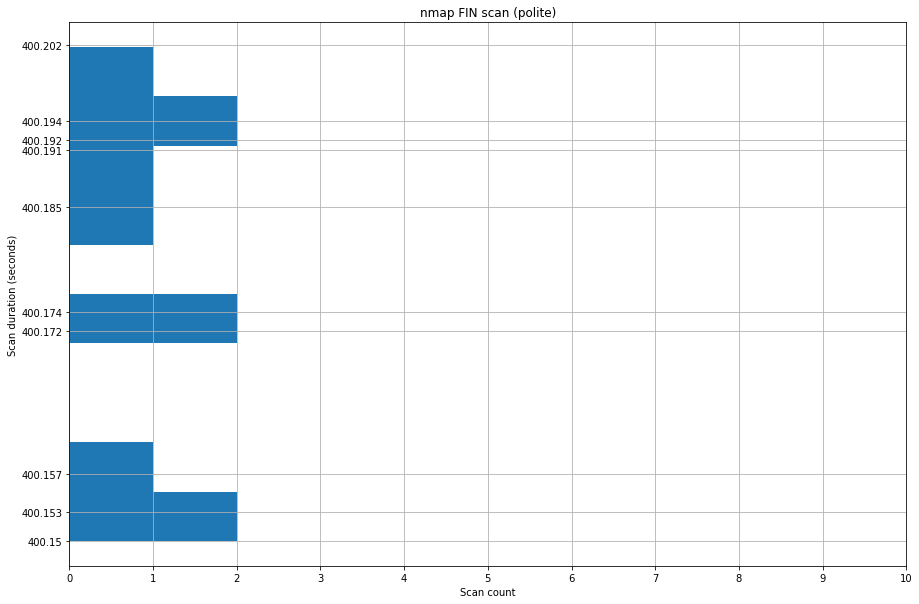

In [8]:
temp.hist(orientation='horizontal')
bin = np.arange(11)
plt.xlabel('Scan count')
plt.ylabel('Scan duration (seconds)')
plt.title(scan_title)
plt.xticks(bin, bin)
yvals = []
for y in duration_list:
    yvals.append(round(y, 3))
        
plt.yticks(yvals, yvals)
plt.savefig(directory + '/Histogram.png')

In [9]:
temp.describe()

,0
count,10.000000
mean,400.177043
std,0.018576
min,400.149995
25%,400.161101
50%,400.179797
75%,400.191726
max,400.201779


## Packet count

In [10]:
number_of_scans = len(scan_list)

print(f"Number of scans: {number_of_scans}")

Number of scans: 10


In [11]:
packet_count_overall = 0
src_count = 0
dst_count = 0
total = 0
for scan in scan_list:
    for x in range(0,len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            src_count = src_count+1
            
        elif scan['ip_dst'][x] == scanner_ip:
            dst_count = dst_count+1

        total = total+1


print(f"Overall packet count: {total}")
print(f"Overall sent packets to scanner: {dst_count}")
print(f"Overall received packets from scanner: {src_count}")

Overall packet count: 20000
Overall sent packets to scanner: 10000
Overall received packets from scanner: 10000


## Packets pr. second

In [12]:
avg = float(scan_times.mean())
if avg < 1:
    pps = (total * avg)
else:
    pps = (total / avg)
print(f"Packets pr. second: {pps}")

Packets pr. second: 49.97787946823365



## Order of ports scanned


In [13]:
scannr = []
sport = []
dport = []

for scan in scan_list:
    i = 1
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                print(i, scan['tcp_sport'][x], scan['tcp_dport'][x])
                scannr.append(i)
                sport.append(scan['tcp_sport'][x])
                dport.append(scan['tcp_dport'][x])
                i = i+1

orders_port = pd.DataFrame({'scannr': scannr,
                            'sport': sport,
                            'dport': dport
                           })

1 37299 135
2 37299 1723
3 37299 110
4 37299 111
5 37299 1025
6 37299 80
7 37299 993
8 37299 5900
9 37299 8080
10 37299 199
11 37299 8888
12 37299 445
13 37299 23
14 37299 3389
15 37299 1720
16 37299 443
17 37299 554
18 37299 256
19 37299 587
20 37299 3306
21 37299 22
22 37299 143
23 37299 139
24 37299 113
25 37299 995
26 37299 21
27 37299 53
28 37299 25
29 37299 15004
30 37299 15660
31 37299 14000
32 37299 5200
33 37299 1052
34 37299 1131
35 37299 7106
36 37299 444
37 37299 11110
38 37299 1105
39 37299 254
40 37299 1149
41 37299 2288
42 37299 1027
43 37299 765
44 37299 30000
45 37299 3404
46 37299 777
47 37299 14238
48 37299 2800
49 37299 1112
50 37299 1046
51 37299 3801
52 37299 40193
53 37299 4343
54 37299 683
55 37299 903
56 37299 1039
57 37299 4998
58 37299 5998
59 37299 3493
60 37299 2022
61 37299 2006
62 37299 1300
63 37299 7938
64 37299 259
65 37299 2500
66 37299 1583
67 37299 3333
68 37299 1095
69 37299 2002
70 37299 8086
71 37299 9111
72 37299 8652
73 37299 1805
74 37299 1057

582 37299 888
583 37299 3268
584 37299 366
585 37299 1971
586 37299 1081
587 37299 1914
588 37299 3000
589 37299 7443
590 37299 1277
591 37299 1417
592 37299 873
593 37299 4848
594 37299 16018
595 37299 9220
596 37299 3905
597 37299 1148
598 37299 5051
599 37299 1187
600 37299 49154
601 37299 19350
602 37299 2030
603 37299 65129
604 37299 1301
605 37299 4002
606 37299 1524
607 37299 8701
608 37299 3828
609 37299 1864
610 37299 83
611 37299 6667
612 37299 1145
613 37299 9594
614 37299 3
615 37299 32776
616 37299 1666
617 37299 5904
618 37299 1875
619 37299 30
620 37299 49163
621 37299 3809
622 37299 8011
623 37299 37
624 37299 3766
625 37299 7627
626 37299 880
627 37299 2000
628 37299 32779
629 37299 5440
630 37299 3914
631 37299 2998
632 37299 30718
633 37299 2399
634 37299 50800
635 37299 19101
636 37299 1042
637 37299 7100
638 37299 1218
639 37299 1935
640 37299 555
641 37299 1998
642 37299 912
643 37299 311
644 37299 2001
645 37299 6689
646 37299 32784
647 37299 3871
648 37299 1113


167 60709 2710
168 60709 8008
169 60709 1718
170 60709 9929
171 60709 1033
172 60709 4550
173 60709 63331
174 60709 32768
175 60709 5906
176 60709 9290
177 60709 1044
178 60709 10566
179 60709 1247
180 60709 1147
181 60709 1300
182 60709 512
183 60709 9099
184 60709 5214
185 60709 2998
186 60709 2170
187 60709 1048
188 60709 32770
189 60709 726
190 60709 2875
191 60709 20000
192 60709 8652
193 60709 2047
194 60709 2604
195 60709 1138
196 60709 1839
197 60709 22939
198 60709 7200
199 60709 5877
200 60709 1148
201 60709 1533
202 60709 722
203 60709 6002
204 60709 6346
205 60709 2288
206 60709 6059
207 60709 1234
208 60709 2022
209 60709 514
210 60709 49159
211 60709 26
212 60709 6580
213 60709 1029
214 60709 2103
215 60709 8042
216 60709 3261
217 60709 5862
218 60709 1218
219 60709 873
220 60709 1066
221 60709 7627
222 60709 6646
223 60709 4001
224 60709 3546
225 60709 8087
226 60709 3390
227 60709 3827
228 60709 3322
229 60709 49161
230 60709 1036
231 60709 60443
232 60709 79
233 60709 

69 40205 1104
70 40205 2605
71 40205 8254
72 40205 5811
73 40205 3871
74 40205 1862
75 40205 2135
76 40205 12345
77 40205 19
78 40205 7100
79 40205 60020
80 40205 65389
81 40205 1244
82 40205 4
83 40205 2381
84 40205 4343
85 40205 8081
86 40205 2920
87 40205 5560
88 40205 6547
89 40205 19350
90 40205 5801
91 40205 800
92 40205 1064
93 40205 1234
94 40205 648
95 40205 5120
96 40205 5000
97 40205 5911
98 40205 8994
99 40205 1072
100 40205 9968
101 40205 1047
102 40205 1087
103 40205 3351
104 40205 898
105 40205 55055
106 40205 8402
107 40205 1023
108 40205 16113
109 40205 8292
110 40205 2607
111 40205 5405
112 40205 1721
113 40205 50000
114 40205 32783
115 40205 902
116 40205 2179
117 40205 44501
118 40205 4279
119 40205 1352
120 40205 7201
121 40205 1099
122 40205 1074
123 40205 49153
124 40205 20828
125 40205 49167
126 40205 1783
127 40205 5280
128 40205 1027
129 40205 1164
130 40205 9009
131 40205 85
132 40205 7070
133 40205 2492
134 40205 2394
135 40205 9103
136 40205 1041
137 40205 

623 40205 163
624 40205 1061
625 40205 2604
626 40205 5877
627 40205 2008
628 40205 9485
629 40205 52869
630 40205 6025
631 40205 99
632 40205 1085
633 40205 32775
634 40205 11111
635 40205 6692
636 40205 8500
637 40205 49999
638 40205 49163
639 40205 1097
640 40205 3003
641 40205 9002
642 40205 9878
643 40205 1138
644 40205 541
645 40205 9001
646 40205 2002
647 40205 280
648 40205 1718
649 40205 2004
650 40205 5666
651 40205 10000
652 40205 843
653 40205 5859
654 40205 1309
655 40205 20222
656 40205 1719
657 40205 1271
658 40205 1248
659 40205 1124
660 40205 8088
661 40205 49
662 40205 34571
663 40205 3800
664 40205 41511
665 40205 2260
666 40205 20221
667 40205 7778
668 40205 45100
669 40205 49161
670 40205 3998
671 40205 3546
672 40205 5510
673 40205 7800
674 40205 22939
675 40205 179
676 40205 5906
677 40205 32780
678 40205 1083
679 40205 3986
680 40205 901
681 40205 14000
682 40205 2048
683 40205 2191
684 40205 10001
685 40205 50001
686 40205 1110
687 40205 10024
688 40205 90
689 

289 50559 2068
290 50559 3071
291 50559 5877
292 50559 749
293 50559 1839
294 50559 8002
295 50559 1248
296 50559 3011
297 50559 898
298 50559 49155
299 50559 6123
300 50559 2288
301 50559 616
302 50559 1328
303 50559 683
304 50559 20222
305 50559 34572
306 50559 5679
307 50559 8192
308 50559 3971
309 50559 10012
310 50559 106
311 50559 3077
312 50559 9876
313 50559 1042
314 50559 1007
315 50559 49175
316 50559 3551
317 50559 9618
318 50559 255
319 50559 2401
320 50559 425
321 50559 6156
322 50559 2034
323 50559 366
324 50559 8008
325 50559 19801
326 50559 9878
327 50559 1296
328 50559 7627
329 50559 10010
330 50559 2020
331 50559 44176
332 50559 901
333 50559 888
334 50559 1032
335 50559 7106
336 50559 1998
337 50559 49156
338 50559 9101
339 50559 15742
340 50559 1114
341 50559 524
342 50559 55555
343 50559 6566
344 50559 513
345 50559 1183
346 50559 11967
347 50559 109
348 50559 1218
349 50559 9002
350 50559 2048
351 50559 2260
352 50559 5200
353 50559 5431
354 50559 1556
355 50559 1

955 50559 6839
956 50559 777
957 50559 7921
958 50559 2106
959 50559 512
960 50559 49163
961 50559 15003
962 50559 417
963 50559 1148
964 50559 1031
965 50559 5100
966 50559 3827
967 50559 5226
968 50559 18101
969 50559 1085
970 50559 3001
971 50559 3828
972 50559 16000
973 50559 9418
974 50559 14442
975 50559 5061
976 50559 10215
977 50559 7435
978 50559 6689
979 50559 32780
980 50559 6881
981 50559 63331
982 50559 25734
983 50559 1971
984 50559 1073
985 50559 1185
986 50559 981
987 50559 10180
988 50559 1688
989 50559 1259
990 50559 2042
991 50559 5357
992 50559 2160
993 50559 3580
994 50559 2041
995 50559 17
996 50559 1108
997 50559 52848
998 50559 3809
999 50559 2170
1000 50559 2126
1 65177 445
2 65177 139
3 65177 53
4 65177 135
5 65177 587
6 65177 199
7 65177 21
8 65177 3306
9 65177 110
10 65177 25
11 65177 8080
12 65177 1025
13 65177 22
14 65177 995
15 65177 8888
16 65177 111
17 65177 1723
18 65177 80
19 65177 993
20 65177 443
21 65177 113
22 65177 1720
23 65177 554
24 65177 256


622 65177 1755
623 65177 3878
624 65177 406
625 65177 1141
626 65177 9101
627 65177 5566
628 65177 211
629 65177 1011
630 65177 5901
631 65177 636
632 65177 1045
633 65177 37
634 65177 666
635 65177 497
636 65177 5903
637 65177 7999
638 65177 9207
639 65177 1027
640 65177 1147
641 65177 16113
642 65177 687
643 65177 33354
644 65177 52848
645 65177 1093
646 65177 2323
647 65177 32785
648 65177 2800
649 65177 777
650 65177 6692
651 65177 3871
652 65177 57797
653 65177 1047
654 65177 2179
655 65177 50003
656 65177 56738
657 65177 1046
658 65177 1057
659 65177 1130
660 65177 24800
661 65177 32778
662 65177 45100
663 65177 1503
664 65177 2251
665 65177 6547
666 65177 1107
667 65177 1061
668 65177 8500
669 65177 1972
670 65177 32769
671 65177 26214
672 65177 617
673 65177 512
674 65177 18988
675 65177 1248
676 65177 49165
677 65177 1863
678 65177 6346
679 65177 8800
680 65177 3801
681 65177 2725
682 65177 3905
683 65177 1114
684 65177 30718
685 65177 2119
686 65177 1041
687 65177 9111
688 65

288 40436 1782
289 40436 444
290 40436 900
291 40436 801
292 40436 8402
293 40436 5950
294 40436 20
295 40436 5904
296 40436 726
297 40436 9593
298 40436 2040
299 40436 9050
300 40436 32772
301 40436 5999
302 40436 1001
303 40436 49155
304 40436 8000
305 40436 1352
306 40436 14442
307 40436 1117
308 40436 2393
309 40436 8009
310 40436 8290
311 40436 1049
312 40436 264
313 40436 49152
314 40436 16080
315 40436 1007
316 40436 711
317 40436 31337
318 40436 787
319 40436 1218
320 40436 27715
321 40436 911
322 40436 2068
323 40436 9968
324 40436 9040
325 40436 1718
326 40436 5962
327 40436 3476
328 40436 7921
329 40436 4126
330 40436 8899
331 40436 2811
332 40436 211
333 40436 9877
334 40436 1074
335 40436 4001
336 40436 50500
337 40436 6346
338 40436 3871
339 40436 1089
340 40436 99
341 40436 1123
342 40436 9001
343 40436 1002
344 40436 1164
345 40436 144
346 40436 1174
347 40436 32780
348 40436 6510
349 40436 2323
350 40436 714
351 40436 1076
352 40436 10012
353 40436 15660
354 40436 1069

954 40436 32781
955 40436 3703
956 40436 2047
957 40436 8500
958 40436 2382
959 40436 3784
960 40436 24
961 40436 6112
962 40436 6006
963 40436 32770
964 40436 5963
965 40436 2105
966 40436 5566
967 40436 2048
968 40436 2103
969 40436 7800
970 40436 1092
971 40436 32774
972 40436 1192
973 40436 90
974 40436 1580
975 40436 6129
976 40436 7627
977 40436 33899
978 40436 2111
979 40436 44501
980 40436 1947
981 40436 81
982 40436 901
983 40436 7201
984 40436 57797
985 40436 9999
986 40436 60020
987 40436 14238
988 40436 10566
989 40436 50800
990 40436 119
991 40436 2144
992 40436 5915
993 40436 3261
994 40436 9535
995 40436 5431
996 40436 2383
997 40436 27355
998 40436 407
999 40436 2161
1000 40436 3370
1 57702 25
2 57702 3306
3 57702 143
4 57702 199
5 57702 1025
6 57702 111
7 57702 3389
8 57702 23
9 57702 80
10 57702 135
11 57702 256
12 57702 1720
13 57702 995
14 57702 139
15 57702 443
16 57702 8888
17 57702 554
18 57702 993
19 57702 53
20 57702 445
21 57702 587
22 57702 5900
23 57702 8080

983 57702 32768
984 57702 1216
985 57702 1175
986 57702 9091
987 57702 1974
988 57702 6792
989 57702 14441
990 57702 2492
991 57702 5500
992 57702 2401
993 57702 1687
994 57702 2191
995 57702 5431
996 57702 8654
997 57702 44501
998 57702 1277
999 57702 541
1000 57702 56737
1 40920 111
2 40920 443
3 40920 25
4 40920 22
5 40920 199
6 40920 21
7 40920 143
8 40920 8080
9 40920 1723
10 40920 1720
11 40920 53
12 40920 256
13 40920 80
14 40920 995
15 40920 8888
16 40920 5900
17 40920 139
18 40920 554
19 40920 110
20 40920 3389
21 40920 113
22 40920 1025
23 40920 3306
24 40920 587
25 40920 135
26 40920 993
27 40920 445
28 40920 23
29 40920 8007
30 40920 2009
31 40920 55555
32 40920 2967
33 40920 1935
34 40920 8873
35 40920 2047
36 40920 1068
37 40920 6788
38 40920 1501
39 40920 10000
40 40920 1149
41 40920 6112
42 40920 4003
43 40920 5802
44 40920 1688
45 40920 32774
46 40920 49
47 40920 2875
48 40920 9002
49 40920 6668
50 40920 1117
51 40920 52673
52 40920 1801
53 40920 777
54 40920 1055
55 4

620 40920 2717
621 40920 808
622 40920 1236
623 40920 6881
624 40920 32783
625 40920 1024
626 40920 16012
627 40920 5800
628 40920 9200
629 40920 8500
630 40920 1095
631 40920 2001
632 40920 9103
633 40920 27353
634 40920 9080
635 40920 5001
636 40920 3827
637 40920 7938
638 40920 5054
639 40920 9618
640 40920 6789
641 40920 1061
642 40920 1213
643 40920 32769
644 40920 5510
645 40920 3527
646 40920 3077
647 40920 52848
648 40920 51493
649 40920 2033
650 40920 38292
651 40920 5357
652 40920 3871
653 40920 88
654 40920 3737
655 40920 20222
656 40920 16001
657 40920 81
658 40920 2034
659 40920 6510
660 40920 2038
661 40920 8654
662 40920 1002
663 40920 7937
664 40920 10003
665 40920 705
666 40920 481
667 40920 1102
668 40920 24
669 40920 1051
670 40920 7201
671 40920 5998
672 40920 50003
673 40920 1218
674 40920 3828
675 40920 2121
676 40920 3390
677 40920 2022
678 40920 1032
679 40920 3986
680 40920 6667
681 40920 1122
682 40920 60020
683 40920 1063
684 40920 1166
685 40920 1186
686 409

287 57169 50003
288 57169 20221
289 57169 5550
290 57169 683
291 57169 625
292 57169 8045
293 57169 1247
294 57169 1217
295 57169 32779
296 57169 1043
297 57169 2045
298 57169 1119
299 57169 1277
300 57169 9929
301 57169 2010
302 57169 27355
303 57169 1233
304 57169 8099
305 57169 2875
306 57169 9040
307 57169 10012
308 57169 10025
309 57169 10004
310 57169 19315
311 57169 5678
312 57169 6692
313 57169 5631
314 57169 901
315 57169 1069
316 57169 720
317 57169 6669
318 57169 1216
319 57169 49400
320 57169 70
321 57169 999
322 57169 1107
323 57169 9878
324 57169 1027
325 57169 1102
326 57169 1121
327 57169 1057
328 57169 2100
329 57169 714
330 57169 20222
331 57169 32769
332 57169 5440
333 57169 2809
334 57169 1083
335 57169 3013
336 57169 1100
337 57169 55056
338 57169 1032
339 57169 49158
340 57169 2035
341 57169 1126
342 57169 1124
343 57169 32774
344 57169 60443
345 57169 6389
346 57169 40911
347 57169 49161
348 57169 1058
349 57169 8600
350 57169 1088
351 57169 8899
352 57169 9877
3

953 57169 524
954 57169 1038
955 57169 6002
956 57169 2394
957 57169 1030
958 57169 9917
959 57169 1047
960 57169 8402
961 57169 5080
962 57169 14442
963 57169 6510
964 57169 5810
965 57169 2190
966 57169 3766
967 57169 6003
968 57169 2604
969 57169 5906
970 57169 481
971 57169 2111
972 57169 8081
973 57169 3871
974 57169 1035
975 57169 1839
976 57169 163
977 57169 900
978 57169 8021
979 57169 1244
980 57169 1046
981 57169 3371
982 57169 1201
983 57169 3071
984 57169 1163
985 57169 2007
986 57169 4
987 57169 4003
988 57169 3325
989 57169 9618
990 57169 9009
991 57169 2099
992 57169 6788
993 57169 1055
994 57169 5200
995 57169 1077
996 57169 9101
997 57169 5003
998 57169 7921
999 57169 17988
1000 57169 8009
1 54186 1025
2 54186 5900
3 54186 22
4 54186 8080
5 54186 25
6 54186 23
7 54186 445
8 54186 3306
9 54186 113
10 54186 443
11 54186 80
12 54186 8888
13 54186 3389
14 54186 143
15 54186 199
16 54186 256
17 54186 1723
18 54186 587
19 54186 554
20 54186 53
21 54186 135
22 54186 111
23 54

620 54186 555
621 54186 45100
622 54186 19315
623 54186 1782
624 54186 4126
625 54186 52673
626 54186 6667
627 54186 1580
628 54186 5906
629 54186 16993
630 54186 1718
631 54186 1075
632 54186 7004
633 54186 1069
634 54186 1113
635 54186 8002
636 54186 7002
637 54186 7676
638 54186 1556
639 54186 1117
640 54186 8042
641 54186 2701
642 54186 1
643 54186 8649
644 54186 6699
645 54186 8193
646 54186 6779
647 54186 42510
648 54186 1067
649 54186 4242
650 54186 1154
651 54186 33354
652 54186 44443
653 54186 1070
654 54186 5004
655 54186 55056
656 54186 5102
657 54186 15742
658 54186 458
659 54186 32774
660 54186 1666
661 54186 12174
662 54186 1141
663 54186 5822
664 54186 6547
665 54186 1093
666 54186 1272
667 54186 616
668 54186 1044
669 54186 1840
670 54186 49156
671 54186 1148
672 54186 7100
673 54186 9618
674 54186 6006
675 54186 3914
676 54186 1352
677 54186 9418
678 54186 49160
679 54186 83
680 54186 3001
681 54186 1310
682 54186 6692
683 54186 32783
684 54186 41511
685 54186 9100
686

In [14]:
orders_port

,scannr,sport,dport
0,1,37299,135
1,2,37299,1723
2,3,37299,110
3,4,37299,111
4,5,37299,1025
...,...,...,...
9995,996,54186,8180
9996,997,54186,1064
9997,998,54186,2200
9998,999,54186,9998


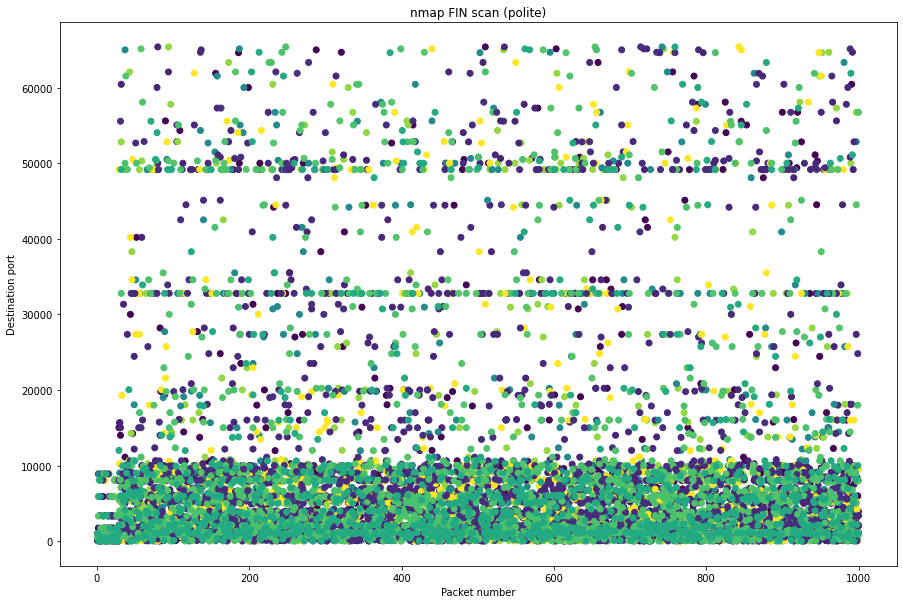

In [15]:
plt.xlabel('Packet number')
plt.ylabel('Destination port')
plt.title(scan_title)
plt.scatter(x='scannr', y='dport', c='sport', data=orders_port)
plt.savefig(directory + '/DstPacketNr.png')

In [16]:
#orders_port.set_index('scannr', inplace=True)
#orders_port.groupby('sport')['dport'].plot(legend=True)
#plt.xlabel('Packet number')
#plt.ylabel('Destination ports')
#plt.title(scan_title)

In [17]:
tcp_sports = []
tcp_dports = []
payloads = []
run = []
i = 1

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            if scan['ip_proto'][x] == 6: # tcp
                tcp_sports.append(row['tcp_sport'][x])
                tcp_dports.append(row['tcp_dport'][x])
                run.append(i)
            payloads.append(row['payload'][x])

    i = i+1
payloads = pd.DataFrame(payloads)

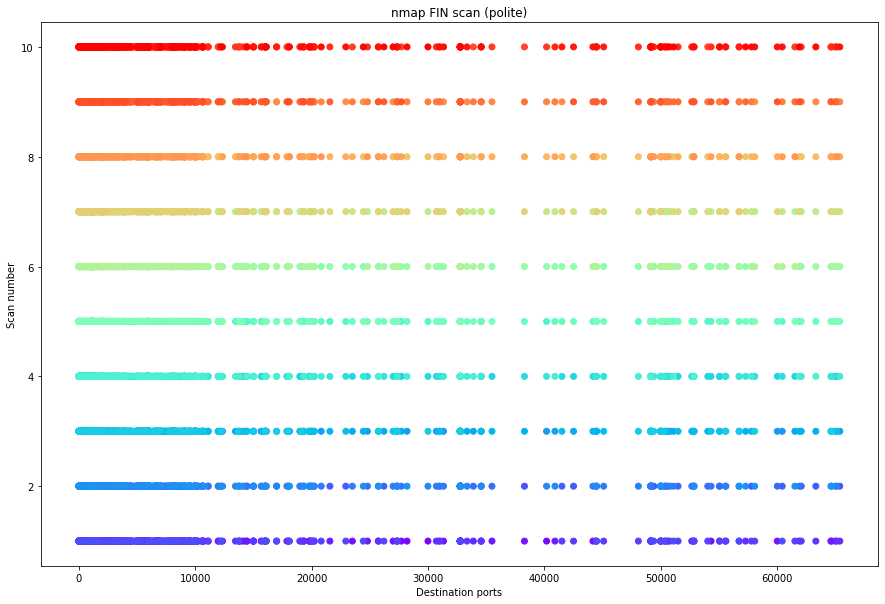

In [18]:
#y = tcp_sports
y = run
x = tcp_dports
colors = cm.rainbow(np.linspace(0, 1, len(y)))
plt.ylabel('Scan number')
plt.xlabel('Destination ports')
plt.title(scan_title)
plt.scatter(x, y, color=colors)
plt.savefig(directory + '/ScanNrDstPort.png')
plt.show()


## Payloads

In [19]:
payloads.value_counts()

0.0    10000
dtype: int64

## IP-ID

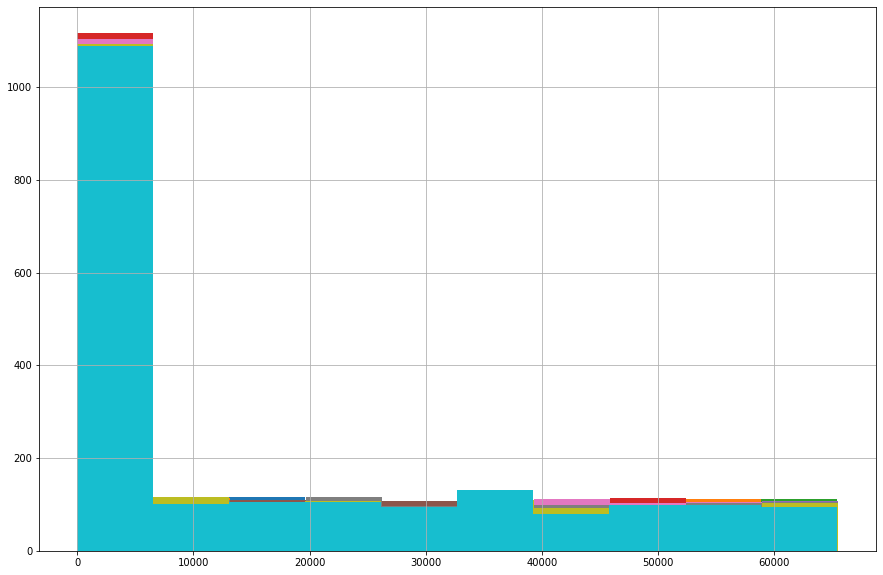

In [20]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            pass
    
    scan['ip_id'].hist()

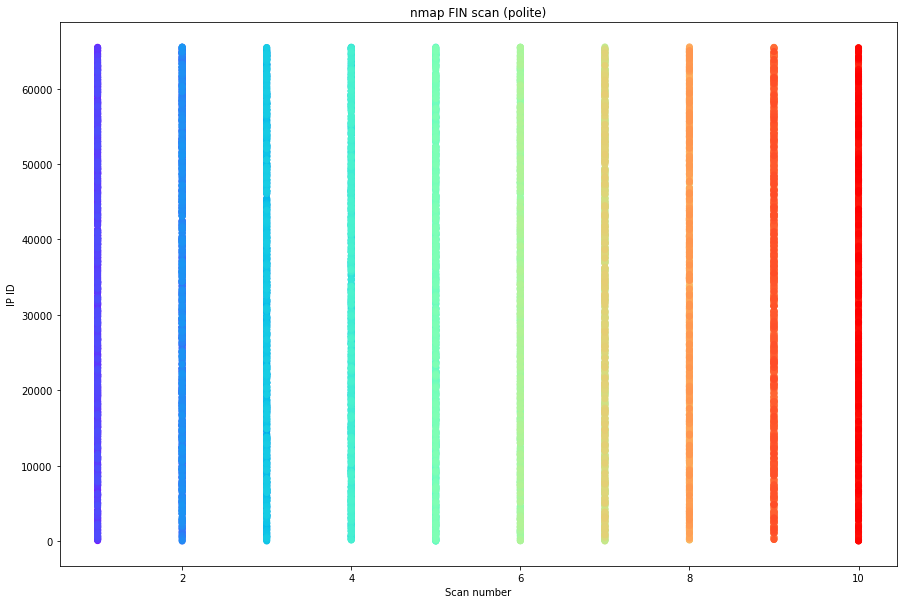

In [21]:
ip_ids = []
scan_number = []
scan_nr = 0

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            scan_number.append(scan_nr)



x = scan_number
ys = ip_ids
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
plt.xlabel('Scan number')
plt.ylabel('IP ID')
plt.title(scan_title)
plt.scatter(x, ys, color=colors)
plt.savefig(directory + '/IPIDScanNr.png')
plt.show()

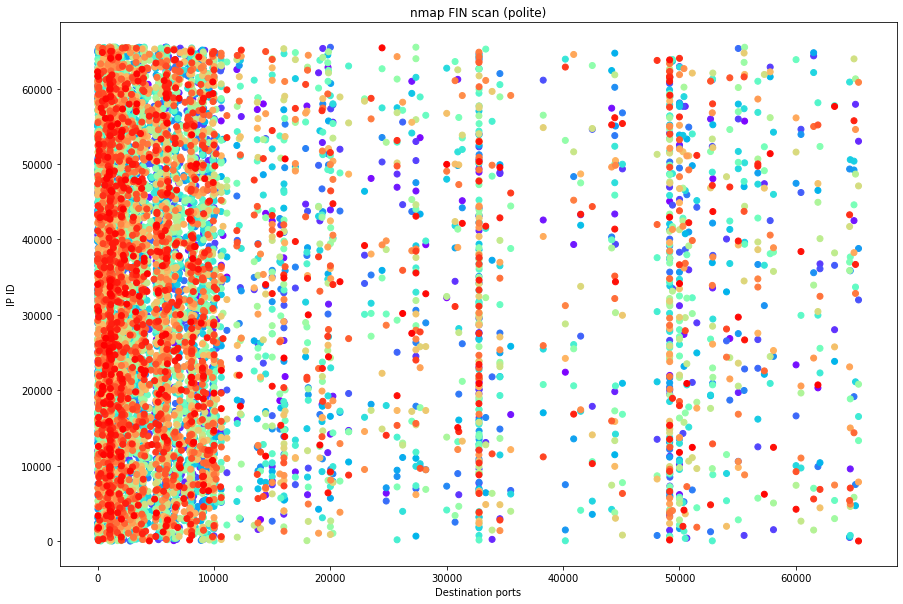

In [22]:
ip_ids = []
scan_number = []
dst_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                dst_ports.append(row['tcp_dport'][x])

if dst_ports:
    x = dst_ports
    ys = ip_ids

    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDDstPort.png')
    plt.show()

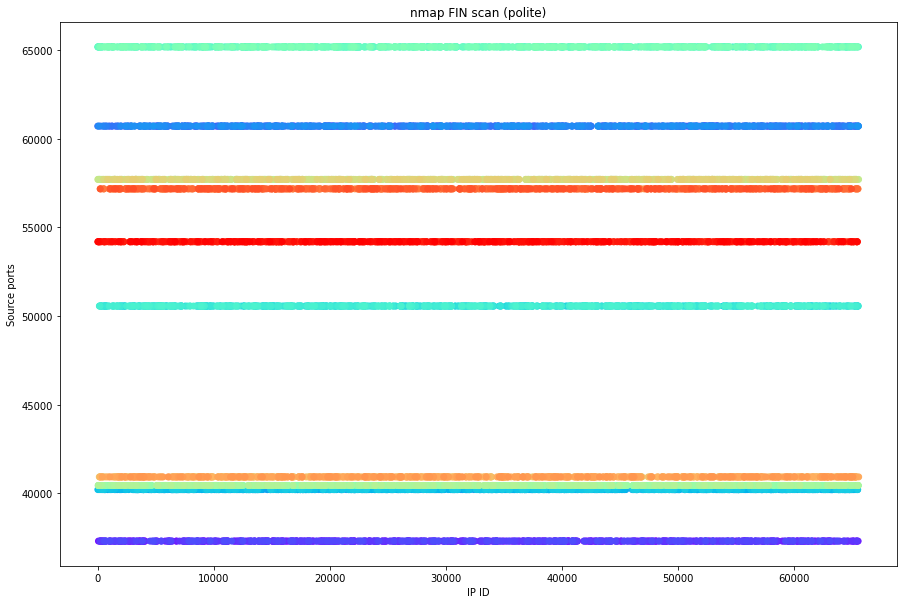

In [23]:
ip_ids = []
scan_number = []
src_ports = []

for row in scan_list:
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:
            ip_ids.append(row['ip_id'][x])
            if scan['ip_proto'][x] == 6: # tcp
                src_ports.append(row['tcp_sport'][x])

if src_ports:
    ys = src_ports
    x = ip_ids
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.ylabel('Source ports')
    plt.xlabel('IP ID')
    plt.title(scan_title)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/IPIDSrcPort.png')
    plt.show()

## Packet size
Calculate 'Packet size' - note that this is only ip + udp/icmp/tcp (no ethernet header included in the calculation)

In [24]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                packet_size = scan['ip_len'][x]
            elif scan['ip_proto'][x] == 14: # udp
                packet_size = scan['ip_len'][x] + scan['udp_len'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                packet_size = scan['ip_len'][x] + scan['icmp_len'][x]
            else:
                packet_size = None

            if packet_size:
                print(f"Packet length: {packet_size}")
            
    print("-----")

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet length: 40
Packet len

## TCP Window size

In [25]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                window_size = scan['tcp_window'][x]
            else:
                window_size = None
                
            if window_size:
                print(f"Window size: {window_size}")
            
    print("-----")

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window size: 1024
Window siz

## Sequence number


In [26]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                sequence_nr = scan['tcp_seq'][x]
            elif scan['ip_proto'][x] == 1: # icmp
                sequence_nr = scan['icmp_seq'][x]
            else:
                sequence_nr = None
                
            if sequence_nr:
                print(f"Sequence number: {sequence_nr}")
            
    print("-----")

Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 2652810253
Sequence number: 265

Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence number: 82290637
Sequence num

Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 1589847794
Sequence number: 158

Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
Sequence number: 639244360
S

Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 1707180996
Sequence number: 170

Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
Sequence number: 139624154
S

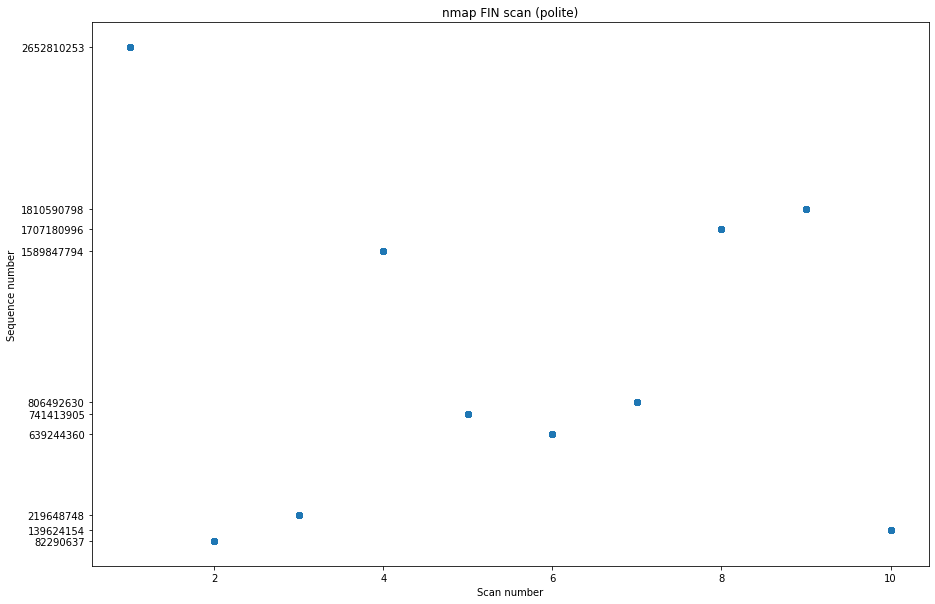

In [27]:
sequences = []
scan_number = []
scan_nr = 0
dst_ports = []
src_ports = []

for row in scan_list:
    scan_nr = scan_nr + 1
    for x in range(0, len(row)):
        if row['ip_src'][x] == scanner_ip:

            if scan['ip_proto'][x] == 6: # tcp
                sequences.append(row['tcp_seq'][x])
                dst_ports.append(row['tcp_dport'][x])
                src_ports.append(row['tcp_sport'][x])
            elif scan['ip_proto'][x] == 1: # icmp
                sequences.append(row['icmp_seq'][x])

            scan_number.append(scan_nr)


x = scan_number
ys = sequences

plt.xlabel('Scan number')
plt.ylabel('Sequence number')
plt.title(scan_title)
yvals = []
for y in set(ys):
    yvals.append(int(y))

plt.yticks(yvals, yvals)
plt.scatter(x, ys)
plt.savefig(directory + '/SeqNrScanNr.png')
plt.show()

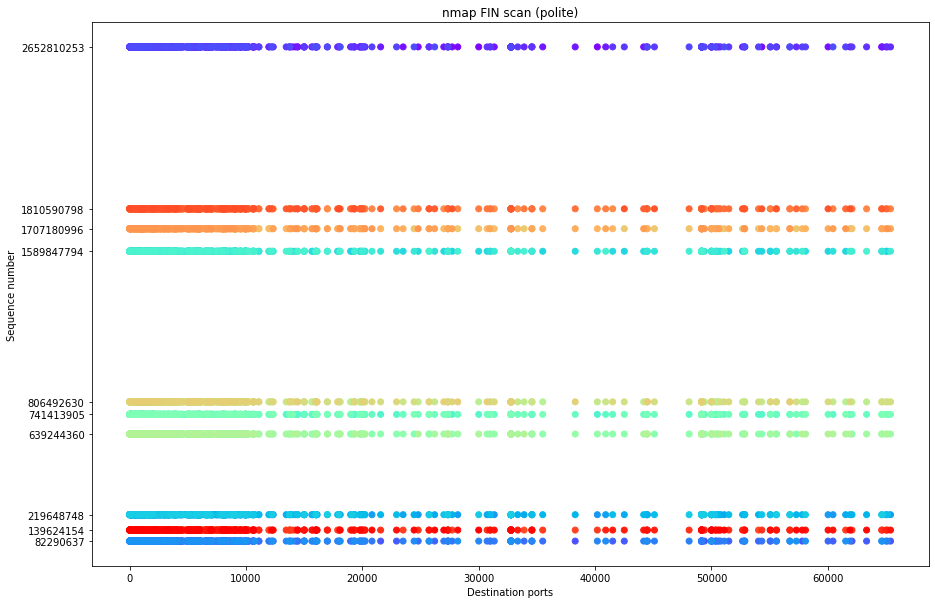

In [28]:
if dst_ports:
    x = dst_ports
    ys = sequences
    colors = cm.rainbow(np.linspace(0, 1, len(ys)))
    plt.xlabel('Destination ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys, color=colors)
    plt.savefig(directory + '/SeqNrDstPort.png')
    plt.show()

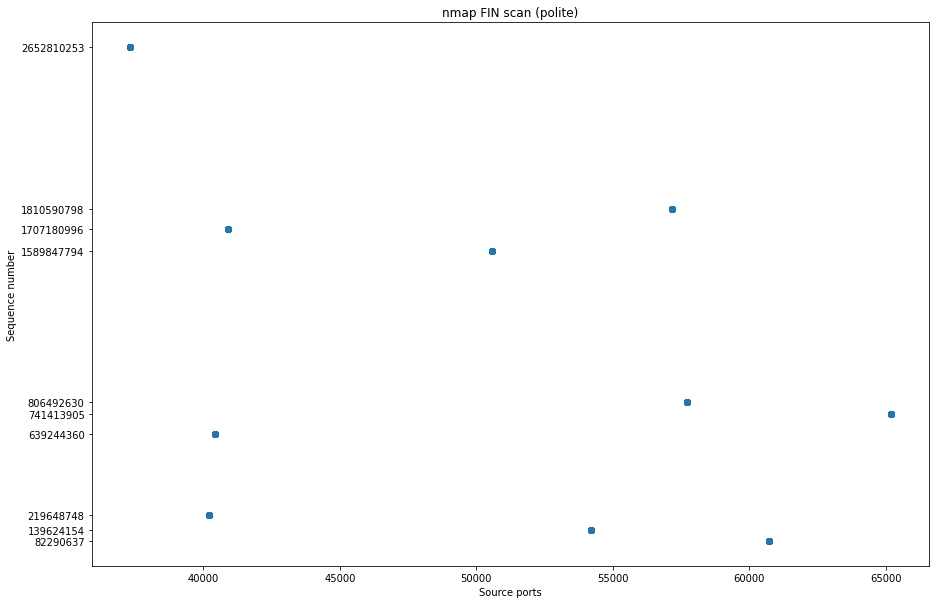

In [29]:
if src_ports:
    x = src_ports
    ys = sequences
    plt.xlabel('Source ports')
    plt.ylabel('Sequence number')
    plt.title(scan_title)
    yvals = []
    for y in set(ys):
        yvals.append(int(y))

    plt.yticks(yvals, yvals)
    plt.scatter(x, ys)
    plt.savefig(directory + '/SeqNrSrcPort.png')
    plt.show()

In [30]:
len(set(orders_port['sport']))

10

## Flags

In [31]:
for scan in scan_list:
    for x in range(0, len(scan)):
        if scan['ip_src'][x] == scanner_ip:
            
            if scan['ip_proto'][x] == 6: # tcp
                flags = scan['tcp_flags'][x]
            elif scan['ip_proto'][x] == 14 or scan['ip_proto'][x] == 1: # udp and icmp
                flags = scan['ip_flags'][x]
            else:
                flags = None

            if flags:
                print(f"Flags: {flags}")
            
    print("-----")

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F

Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
Flags: F
F